---
# Reinforcement Learning in Grid World

This notebook demonstrates two reinforcement learning algorithms:
1. **Value Iteration** for finding the optimal policy in a grid world.
2. **Q-Learning** for learning Q-values in a grid world.

Both algorithms are applied to a 5x5 grid world where the agent receives a reward of +10 for reaching the goal state and -1 for every other step. The discount factor (`gamma`) is set to 0.9.

---

### Import necessary libraries

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random # For Q-Learning Algorithm 

### Define the Grid World Environment

In [55]:
GRID_SIZE = 5
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']
ACTION_TO_INDEX = {a: i for i, a in enumerate(ACTIONS)}
GAMMA = 0.9
THETA = 1e-6  # Convergence threshold

ALPHA = 0.5 # For Q-Learning Algorithm 
EPISODES = 1000 # For Q-Learning Algorithm 

### Reward structure

In [56]:
REWARDS = np.full((GRID_SIZE, GRID_SIZE), -1)
GOAL_STATE = (4, 4)
REWARDS[GOAL_STATE] = 10

### Determine next state

In [57]:
def next_state(i, j, action):
    if action == 'UP':
        return max(0, i - 1), j
    elif action == 'DOWN':
        return min(GRID_SIZE - 1, i + 1), j
    elif action == 'LEFT':
        return i, max(0, j - 1)
    elif action == 'RIGHT':
        return i, min(GRID_SIZE - 1, j + 1)

---

## Question 1: Value Iteration

### Goal
Find the optimal policy for each state in the grid world using the **Value Iteration** algorithm.

### Steps:
1. Initialize the value function `V` for all states.
2. Iteratively update the value function using the Bellman equation.
3. Derive the optimal policy by selecting the action that maximizes the expected reward for each state.
4. Visualize the optimal policy and value function using a heatmap.

---

### Value Iteration Algorithm Implemenation

In [58]:
def value_iteration():
    # Initialize value function
    Vf = np.zeros((GRID_SIZE, GRID_SIZE))
    
    while True:
        delta = 0
        # Loop over all states
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) == GOAL_STATE:
                    continue  # Skip the goal state
                V = Vf[i, j]  # Store the current value
                # Compute the value for each action
                action_values = []
                for action in ACTIONS:
                    ni, nj = next_state(i, j, action)
                    action_values.append(REWARDS[i, j] + GAMMA * Vf[ni, nj])
                # Update the value function
                Vf[i, j] = max(action_values)
                # Track the maximum change in value
                delta = max(delta, abs(V - Vf[i, j]))
        # Check for convergence
        if delta < THETA:
            break
    
    # Derive the optimal policy
    policy = np.empty((GRID_SIZE, GRID_SIZE), dtype=object)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) == GOAL_STATE:
                policy[i, j] = 'G'  # Mark the goal state
                continue
            action_values = []
            for action in ACTIONS:
                ni, nj = next_state(i, j, action)
                action_values.append(REWARDS[i, j] + GAMMA * Vf[ni, nj])
            # Select the action with the highest value
            best_action = ACTIONS[np.argmax(action_values)]
            policy[i, j] = best_action
    
    return Vf, policy

### Visualization  for the value function and policy function

In [59]:
def visualize_value_iteration(Vf, policy):
    plt.figure(figsize=(12, 5))
    
    # Plot the value function
    plt.subplot(1, 2, 1)
    sns.heatmap(Vf, annot=True, cmap="YlGnBu", cbar=True, square=True)
    plt.title("Optimal Value Function")
    plt.xlabel("Column")
    plt.ylabel("Row")
    
    # Plot the optimal policy
    plt.subplot(1, 2, 2)
    policy_grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if policy[i, j] == 'G':
                policy_grid[i, j] = 10  # Goal state
            else:
                policy_grid[i, j] = ACTION_TO_INDEX[policy[i, j]] + 1  # Map actions to numbers
    sns.heatmap(policy_grid, annot=policy, fmt="", cmap="YlGnBu", cbar=False, square=True)
    plt.title("Optimal Policy (Arrows represent actions)")
    plt.xlabel("Column")
    plt.ylabel("Row")
    
    plt.tight_layout()
    plt.show()

### Running the Value Iteration Algorithm

Optimal Value Function:
[[-5.6953279 -5.217031  -4.68559   -4.0951    -3.439    ]
 [-5.217031  -4.68559   -4.0951    -3.439     -2.71     ]
 [-4.68559   -4.0951    -3.439     -2.71      -1.9      ]
 [-4.0951    -3.439     -2.71      -1.9       -1.       ]
 [-3.439     -2.71      -1.9       -1.         0.       ]]


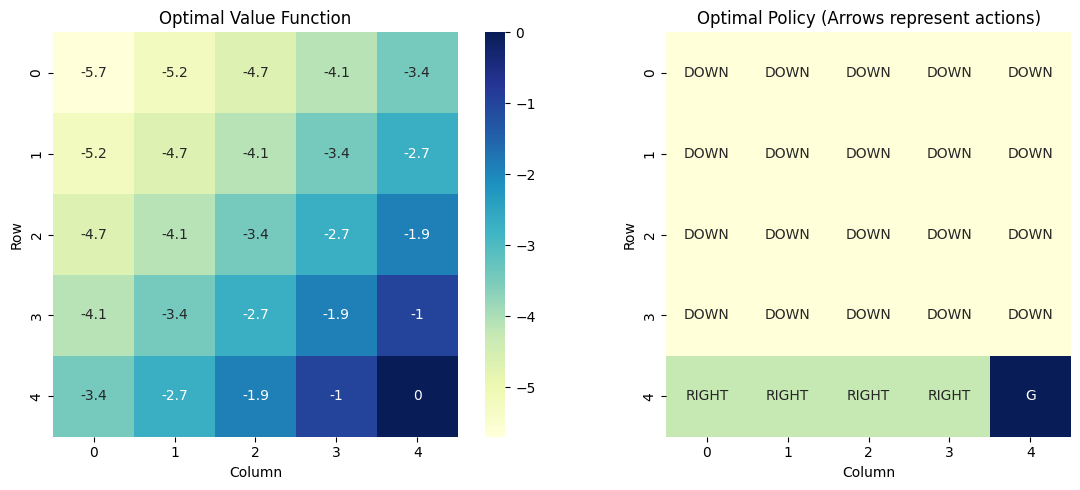

In [60]:
Vf, policy = value_iteration()
print("Optimal Value Function:")
print(Vf)
visualize_value_iteration(Vf, policy)

---
## Question 2: Q-Learning
### Goal
Learn the Q-values for each state-action pair in the grid world using the ** Q-Learning** algorithm.

### Steps:
Initialize the Q-table with zeros.

1. Perform Q-learning for a fixed number of episodes.
2. Update the Q-values using the Bellman equation.
3. Visualize the learned Q-values using a heatmap.

### In this part already defined on question one won't be defined again
---

### Q-Learning Implementation

In [61]:
# Q-Learning Algorithm
def Q_learning():
    # Initialize Q-table
    Q = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))
    
    # Perform Q-learning for a fixed number of episodes
    for episode in range(EPISODES):
        # Start from a random state
        S = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        
        while S != GOAL_STATE:
            # Choose a random action
            action = random.choice(ACTIONS)
            # Compute the next state
            ni, nj = next_state(S[0], S[1], action)
            # Get the reward for the current state
            reward = REWARDS[S]
            # Find the best Q-value for the next state
            best_next_action = np.max(Q[ni, nj])
            # Update the Q-value using the Bellman equation
            Q[S[0], S[1], ACTION_TO_INDEX[action]] += ALPHA * (
                reward + GAMMA * best_next_action - Q[S[0], S[1], ACTION_TO_INDEX[action]]
            )
            # Move to the next state
            S = (ni, nj)
    
    return Q

### Visualize Q-values as a heatmap

In [62]:
def visualize_Q_values(Q):
    plt.figure(figsize=(8, 6))
    sns.heatmap(np.max(Q, axis=2), annot=True, cmap="YlGnBu", cbar=True, square=True)
    plt.title("Learned Q-Values (Maximum Q-value for each state)")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()

### Running the Q-Learning Algorithm

Learned Q-values:
[[[-6.12579511 -5.6953279  -6.12579511 -5.6953279 ]
  [-5.6953279  -5.217031   -6.12579511 -5.217031  ]
  [-5.217031   -4.68559    -5.6953279  -4.68559   ]
  [-4.68559    -4.0951     -5.217031   -4.0951    ]
  [-4.0951     -3.439      -4.68559    -4.0951    ]]

 [[-6.12579511 -5.217031   -5.6953279  -5.217031  ]
  [-5.6953279  -4.68559    -5.6953279  -4.68559   ]
  [-5.217031   -4.0951     -5.217031   -4.0951    ]
  [-4.68559    -3.439      -4.68559    -3.439     ]
  [-4.0951     -2.71       -4.0951     -3.439     ]]

 [[-5.6953279  -4.68559    -5.217031   -4.68559   ]
  [-5.217031   -4.0951     -5.217031   -4.0951    ]
  [-4.68559    -3.439      -4.68559    -3.439     ]
  [-4.0951     -2.71       -4.0951     -2.71      ]
  [-3.439      -1.9        -3.439      -2.71      ]]

 [[-5.217031   -4.0951     -4.68559    -4.0951    ]
  [-4.68559    -3.439      -4.68559    -3.439     ]
  [-4.0951     -2.71       -4.0951     -2.71      ]
  [-3.439      -1.9        -3.439      -

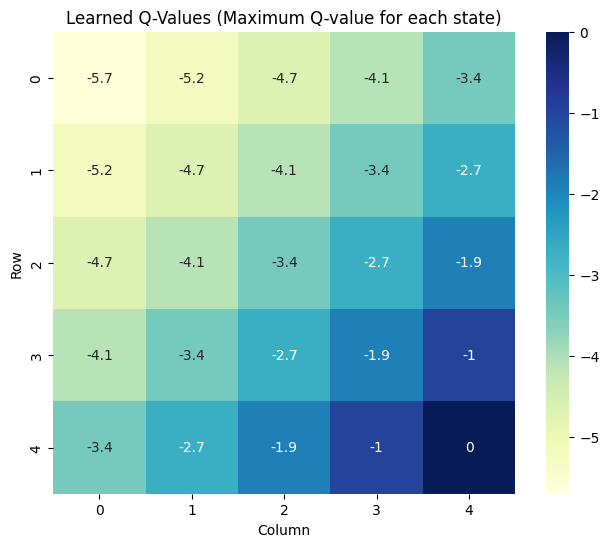

In [63]:
Q_values = Q_learning()
print("Learned Q-values:")
print(Q_values)
visualize_Q_values(Q_values)